# Convolutional Auto Encoder

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import History
history = History()

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

In [8]:
history = model.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.0460 - accuracy: 0.8019 - val_loss: 0.0276 - val_accuracy: 0.8058
Epoch 2/10
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.0241 - accuracy: 0.8069 - val_loss: 0.0214 - val_accuracy: 0.8075
Epoch 3/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.0204 - accuracy: 0.8088 - val_loss: 0.0191 - val_accuracy: 0.8078
Epoch 4/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.0187 - accuracy: 0.8096 - val_loss: 0.0177 - val_accuracy: 0.8090
Epoch 5/10
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.0176 - accuracy: 0.8101 - val_loss: 0.0168 - val_accuracy: 0.8099
Epoch 6/10
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.0167 - accuracy: 0.8105 - val_loss: 0.0164 - val_accuracy: 0.8106
Epoch 7/10
60000/60000 [==========================

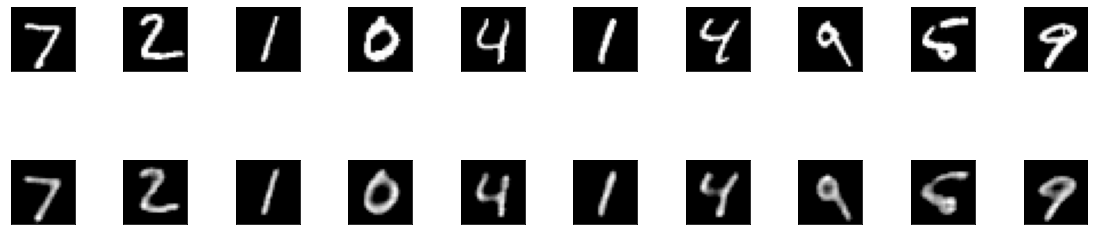

In [18]:
#model.evaluate(x_test, x_test)

#model.save('conv_autoencoder.model')

no_noise_img = model.predict(x_test)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

